<a href="https://colab.research.google.com/github/KaiAlan/Graph-Neural-Network/blob/main/GNN_Model_on_CiteSeer_dataset(Planetoid)1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


1.12.1+cu113
     |████████████████████████████████| 8.9 MB 6.9 MB/s 
     |████████████████████████████████| 3.5 MB 6.3 MB/s 
     |████████████████████████████████| 280 kB 25.6 MB/s 


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import networkx as nx

In [3]:
def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

In [4]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

In [5]:
dataset = Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures())

Processing...
Done!


In [6]:
print()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')


Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6


In [7]:
data = dataset[0]  # Get the first graph object.
print()
print(data)


Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [8]:
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [9]:
data.train_mask

tensor([ True,  True,  True,  ..., False, False, False])

In [10]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

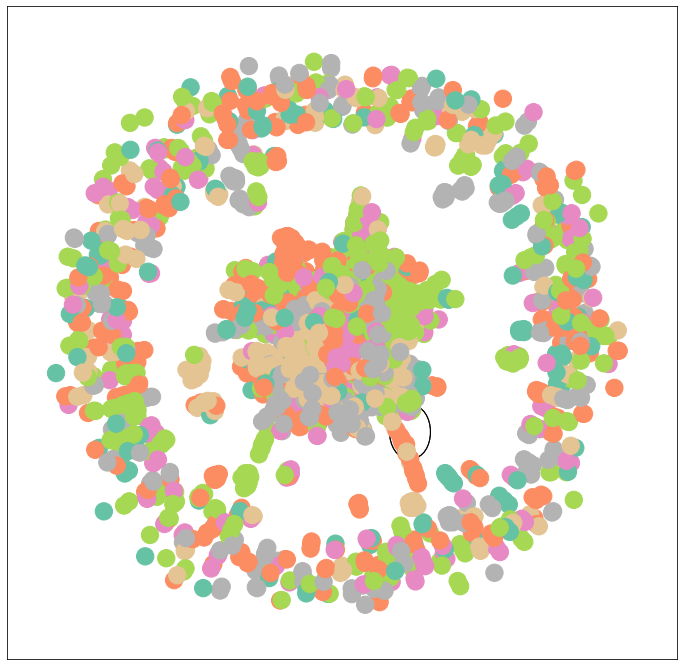

In [11]:
from torch_geometric.utils import to_networkx
cora_undirected_graph = to_networkx(data)
visualize_graph(cora_undirected_graph, color=data.y)

In [12]:
print(f'Edge weight: {data.edge_weight}')
print(f'Graph contains isolated nodes: {data.contains_isolated_nodes()}')

Edge weight: None
Graph contains isolated nodes: True


/usr/local/lib/python3.7/dist-packages/torch_geometric/deprecation.py:12: UserWarning: 'contains_isolated_nodes' is deprecated, use 'has_isolated_nodes' instead
  warnings.warn(out)


In [13]:
print('==============================================================')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of training nodes: 120
Training node label rate: 0.04


In [14]:
print(data)
data.node_stores

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


[{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), 'edge_index': tensor([[   0,    1,    1,  ..., 3324, 3325, 3326],
         [ 628,  158,  486,  ..., 2820, 1643,   33]]), 'y': tensor([3, 1, 5,  ..., 3, 1, 5]), 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]), 'val_mask': tensor([False, False, False,  ..., False, False, False]), 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}]

In [15]:
data.to_dict()

{'x': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 'edge_index': tensor([[   0,    1,    1,  ..., 3324, 3325, 3326],
         [ 628,  158,  486,  ..., 2820, 1643,   33]]),
 'y': tensor([3, 1, 5,  ..., 3, 1, 5]),
 'train_mask': tensor([ True,  True,  True,  ..., False, False, False]),
 'val_mask': tensor([False, False, False,  ..., False, False, False]),
 'test_mask': tensor([False, False, False,  ...,  True,  True,  True])}

In [16]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

<IPython.core.display.Javascript object>

In [18]:
edge_index = data.edge_index
# Print as tensor
print(edge_index.t())

tensor([[   0,  628],
        [   1,  158],
        [   1,  486],
        ...,
        [3324, 2820],
        [3325, 1643],
        [3326,   33]])


In [19]:
edge_index

tensor([[   0,    1,    1,  ..., 3324, 3325, 3326],
        [ 628,  158,  486,  ..., 2820, 1643,   33]])

In [20]:
print(f'Number of classes: {dataset.num_classes}')
print(data)

Number of classes: 6
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [21]:
data.y

tensor([3, 1, 5,  ..., 3, 1, 5])

In [22]:
data.y.shape

torch.Size([3327])

In [23]:
print(data.num_node_features)
print(data.num_features)
print(data.num_nodes)

3703
3703
3327


In [24]:
data.x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [25]:
data.x[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [26]:
# data.x[34] will be out of the range
data.x[33] # all 0 to 33 features

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [27]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

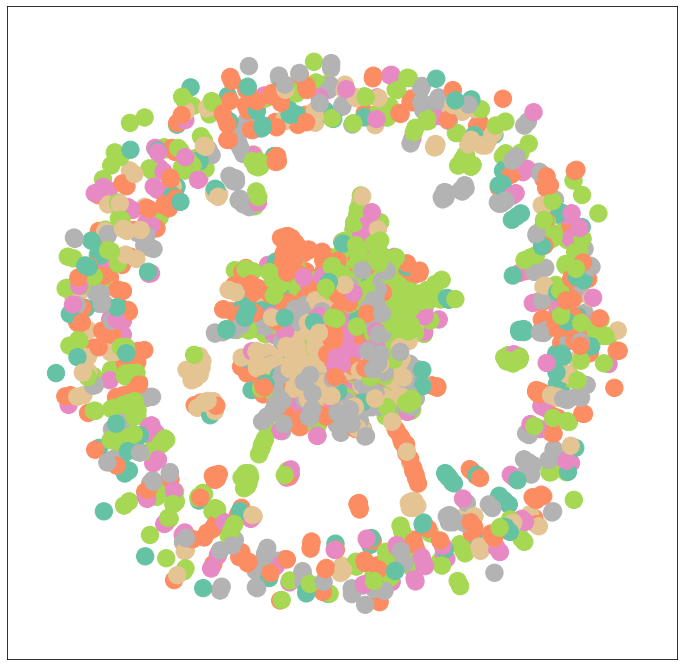

In [28]:
from torch_geometric.utils import to_networkx
karate_undirected_graph = to_networkx(data, to_undirected=True)
visualize_graph(karate_undirected_graph, color=data.y)

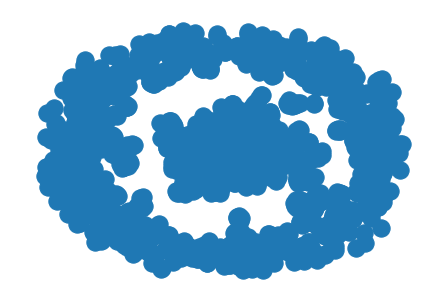

In [29]:
nx.draw(to_networkx(data, to_undirected=True))

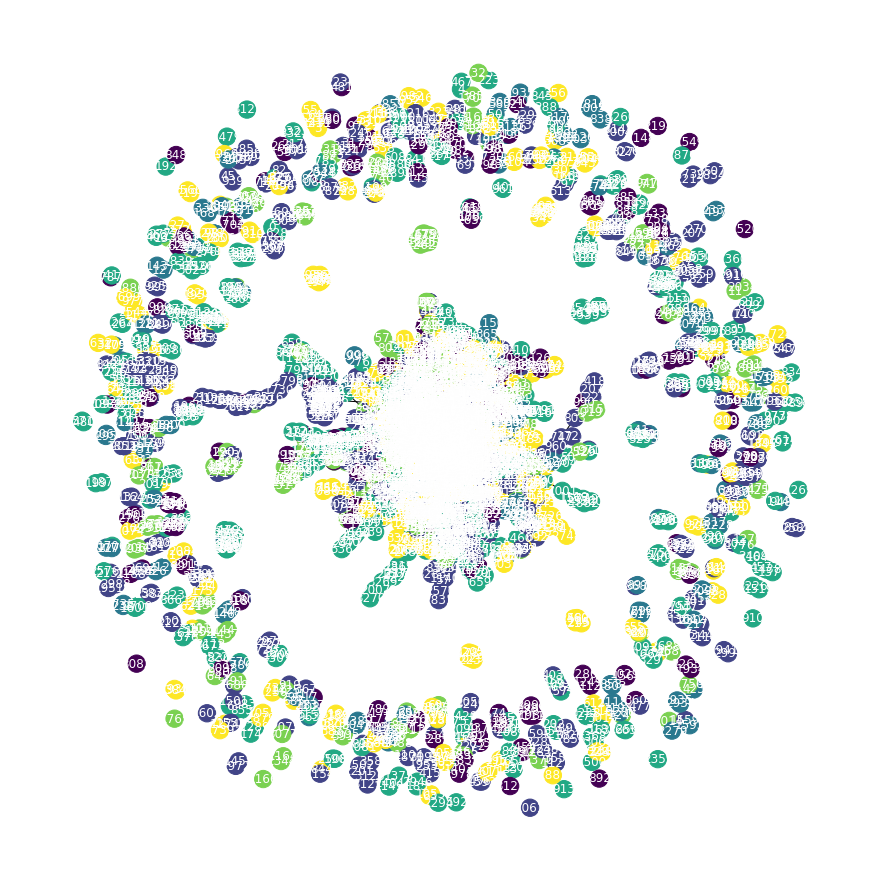

In [31]:
plt.figure(figsize=(12,12))
nx.draw(karate_undirected_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')
# 4 Classes are visible

In [37]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

model = MLP(hidden_channels=16)
print(model)

MLP(
  (lin1): Linear(in_features=3703, out_features=16, bias=True)
  (lin2): Linear(in_features=16, out_features=6, bias=True)
)


In [38]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(hidden_channels=16)
print(model)

GCN(
  (conv1): GCNConv(3703, 16)
  (conv2): GCNConv(16, 6)
)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


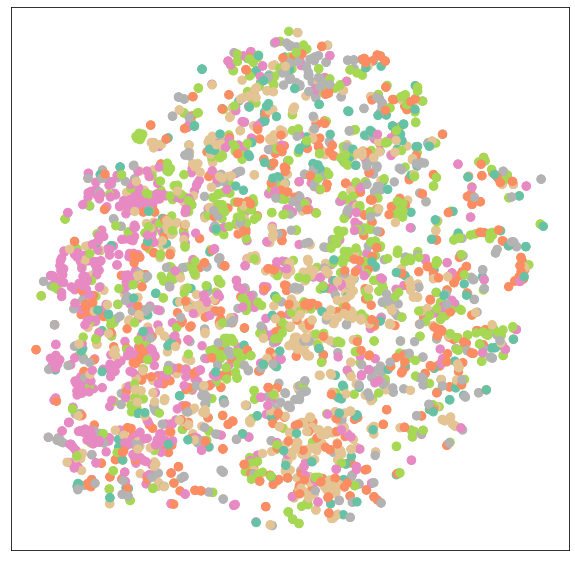

In [39]:
model = GCN(hidden_channels=16)
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [40]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[data.test_mask] == data.y[data.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc


for epoch in range(1, 401):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 1.7915
Epoch: 002, Loss: 1.7872
Epoch: 003, Loss: 1.7790
Epoch: 004, Loss: 1.7732
Epoch: 005, Loss: 1.7622
Epoch: 006, Loss: 1.7545
Epoch: 007, Loss: 1.7456
Epoch: 008, Loss: 1.7306
Epoch: 009, Loss: 1.7176
Epoch: 010, Loss: 1.7118
Epoch: 011, Loss: 1.7051
Epoch: 012, Loss: 1.6902
Epoch: 013, Loss: 1.6706
Epoch: 014, Loss: 1.6682
Epoch: 015, Loss: 1.6452
Epoch: 016, Loss: 1.6364
Epoch: 017, Loss: 1.6175
Epoch: 018, Loss: 1.6022
Epoch: 019, Loss: 1.5919
Epoch: 020, Loss: 1.5786
Epoch: 021, Loss: 1.5580
Epoch: 022, Loss: 1.5587
Epoch: 023, Loss: 1.5523
Epoch: 024, Loss: 1.5183
Epoch: 025, Loss: 1.5227
Epoch: 026, Loss: 1.4945
Epoch: 027, Loss: 1.4771
Epoch: 028, Loss: 1.4522
Epoch: 029, Loss: 1.4381
Epoch: 030, Loss: 1.4225
Epoch: 031, Loss: 1.4258
Epoch: 032, Loss: 1.3926
Epoch: 033, Loss: 1.3942
Epoch: 034, Loss: 1.3792
Epoch: 035, Loss: 1.3574
Epoch: 036, Loss: 1.3155
Epoch: 037, Loss: 1.3188
Epoch: 038, Loss: 1.2947
Epoch: 039, Loss: 1.2736
Epoch: 040, Loss: 1.2764


In [41]:
test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7130


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


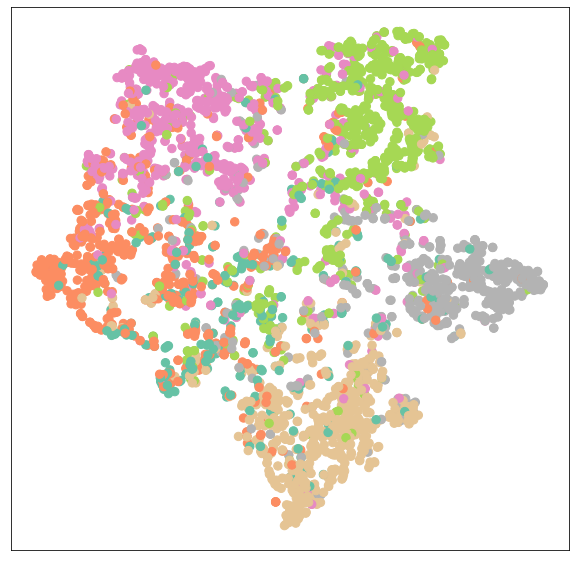

In [42]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)

In [61]:
from torch_geometric.nn import GATConv
import torch.nn.functional as F


class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, heads):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(dataset.num_features, hidden_channels)  # TODO
        self.conv2 = GATConv(hidden_channels, dataset.num_classes)  # TODO

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GAT(hidden_channels=8, heads=8)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc


for epoch in range(1, 401):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

GAT(
  (conv1): GATConv(3703, 8, heads=1)
  (conv2): GATConv(8, 6, heads=1)
)
Epoch: 001, Loss: 1.7920, Val: 0.2420, Test: 0.2330
Epoch: 002, Loss: 1.7890, Val: 0.2240, Test: 0.2520
Epoch: 003, Loss: 1.7863, Val: 0.2440, Test: 0.2680
Epoch: 004, Loss: 1.7825, Val: 0.3600, Test: 0.3900
Epoch: 005, Loss: 1.7807, Val: 0.4620, Test: 0.4910
Epoch: 006, Loss: 1.7796, Val: 0.5300, Test: 0.5450
Epoch: 007, Loss: 1.7720, Val: 0.5740, Test: 0.5900
Epoch: 008, Loss: 1.7710, Val: 0.5720, Test: 0.5780
Epoch: 009, Loss: 1.7688, Val: 0.5780, Test: 0.5710
Epoch: 010, Loss: 1.7650, Val: 0.6000, Test: 0.5960
Epoch: 011, Loss: 1.7629, Val: 0.6180, Test: 0.6210
Epoch: 012, Loss: 1.7632, Val: 0.6200, Test: 0.6390
Epoch: 013, Loss: 1.7515, Val: 0.6380, Test: 0.6490
Epoch: 014, Loss: 1.7513, Val: 0.6320, Test: 0.6430
Epoch: 015, Loss: 1.7513, Val: 0.6180, Test: 0.6320
Epoch: 016, Loss: 1.7447, Val: 0.6060, Test: 0.6120
Epoch: 017, Loss: 1.7455, Val: 0.5880, Test: 0.5900
Epoch: 018, Loss: 1.7411, Val: 0.5920,

In [62]:

test_acc = test(data.test_mask)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.6500


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


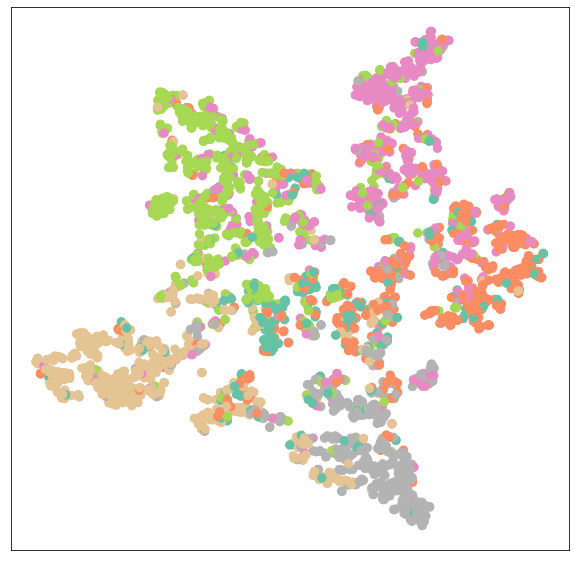

In [63]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=data.y)